In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
import json

In [2]:
with open("./results/08_02/"\
          "18_27_29_eps_100.0_N_mass_5000_repeat_ode_256_v_80.0_time_130.70_THETA_2_m_jullia/"\
          "MassSystem/radii.txt", "r") as file:
    a = file.readline()

rad = np.array(eval(a))
# radii2 = [26127.478692183733, 246027.66234909356, 37740.675732316784, 29768.31889328863, 82295.07216786756, 68503.2990625585, 72536.03193047922, 21870.658392581085, 47994.10415552574, 9335.43814866659, 72207.43737209984, 88088.70972876354, 56848.498382231825, 171654.00938828502, 39962.56663262516, 49599.208785862866, 95620.39554931983, 34245.0995267552, 105199.67433124516, 28976.58873179979, 127052.55468954325, 29336.67135122838, 27161.279126748337, 23422.345141869922, 335470.72299687547, 128786.4542921979, 31765.077253396776, 26652.16597212074, 65263.31535558529, 26298.78542712826, 120851.24451555133, 58921.37643235365, 44684.06553469799, 132776.11225042204, 36858.917250906365, 31095.460078084452, 52048.56380494375, 15655.240464114097, 52583.696969371114, 29984.157829159383, 34692.011787128555, 11335.790316573904, 47816.59396794996, 53895.92370648864, 45211.986192795084, 14988.215785261227, 40761.353963937836, 78515.46627700342, 47605.10089042983, 252029.4799899426, 19875.260170773898, 33204.20492021546, 68413.81999180927, 66199.61045237117, 71517.83517246917, 38657.840919321425, 30791.192892606472, 36727.5633466699, 69346.7565618209, 80602.08501925581, 35373.14537817091, 180815.13835732907, 44924.760322993294, 45523.985428265616, 110457.9350709072, 27253.605932941504, 87781.17679793364, 37374.44354648481, 140120.13650509986, 15427.623128452247, 18109.202822122246, 14882.849987039208, 325935.3232369, 109064.08073233096, 40288.92263049432, 45332.620419219435, 58035.19456140409, 23420.410290183085, 94809.8713409744, 31564.664006995743, 16550.76394416233, 131652.4985917268, 47559.02270663423, 21357.830210245447, 39027.699952728064, 52119.78976861425, 59125.9432050028, 7292.295870815635, 53206.35728580069, 13033.46175802443, 49236.69584513335, 60575.4966999282, 25394.806388137622, 30839.512942990626, 66367.24038188365, 89919.65253897851, 60557.49146735048, 256775.2586790063, 42929.60970143588, 30312.286452644457, 47831.711826290426, 62343.09022033301, 62424.95995279861, 45943.192541926, 13008.322274607348, 46099.27819816899, 55021.30101056366, 65301.32197641402, 44247.47225806626, 187463.94605953642, 32805.37522021824, 40075.97548898254, 117701.55004748312, 9104.770727692749, 61238.07903328225, 43080.025067870796, 150278.07435654194, 14667.117581232009, 40632.270146419585, 44857.63765829009, 315357.9315120477, 82535.30178111221, 52827.58240462204, 42944.50108939386, 30366.62807260888, 26940.48958047937, 58536.57481321361, 29290.069008439958, 26624.549810289212, 125196.77204413663, 45114.88541752162, 41288.17382554083, 23026.91983372326, 69570.71381562954, 52044.81881338015, 9704.212861639024, 49225.35490038816, 21651.596357861752, 33923.670305653475, 54582.89301485596, 58089.15083186519, 36894.45186496768, 80535.09916598149, 98136.89051364677, 55539.680560431574, 260064.8192182768, 61117.753814468095, 47773.72196996366, 34171.38674098132, 48556.16649221308, 47307.715939552596, 30129.81935897787, 31012.51664691464, 29916.10541667035, 42488.31670119529, 38737.27426557125, 58729.65818212518, 191478.4453679804, 17581.30969799777, 44395.58867552402, 117384.19076316015, 11105.093774210516, 52494.514717889186, 33974.63957511834, 157190.13062927153, 36183.37259681387, 40350.998230566605, 65362.72178200522, 304396.07105788303, 45056.56456184758, 58838.159639620884, 28958.003769076862, 16142.007048092466, 57282.363372631204, 14481.522289635526, 35857.16979454709, 31700.182464174486, 113915.0643693445, 38340.00042790412, 61590.25465169298, 20372.977028686226, 68585.74423990486, 30660.32468217884, 30139.053040453124, 22031.21198992073, 38792.92102676927, 30023.190839751845, 32100.995688566254, 84899.22937308396, 15777.283099683393, 77156.66818063434, 102374.85722288484, 34407.163877457584, 262174.78279091226, 62045.28435964795, 48988.44033718443, 43430.6410288085, 28633.282484396394, 33620.45655459053, 34357.28270438854, 37257.43719015951, 19874.153884668573, 39959.335184244184, 37973.337883533044, 56184.061873847575, 193301.62943046342, 45565.06824632943, 44461.374194094155, 109095.44521338215, 18180.67657789797, 54152.338466866575, 29032.115445242805, 161664.27698496144, 28678.5367382955, 11431.569403084437, 63640.53789965022, 291999.02594072797, 32632.27215403614, 54581.60385107475, 30615.224165334574, 40802.6445619525, 74290.5812415489, 54451.54477544823, 25123.62131008014, 25816.842894291007, 95913.08867757459, 29479.30415786517, 63643.250921271974, 38172.60369309279, 45272.79880235342, 31462.552537879536, 37387.11325593906, 27790.82474080052, 23263.40362758903, 34602.27261833296, 21288.247215187093, 103104.3912864087, 12331.927304423472, 59678.40456809634, 102274.11741861881, 16867.184725553736, 262914.79913821473, 48010.879778627066, 30612.80066661172, 49174.04036523427, 55502.27857018492, 48553.220423838044, 32982.14073868901, 30989.384119552593, 36247.223940403666, 48287.7099358607, 62459.44985557272, 33133.901002864804, 192836.86876268836, 55020.8557971571, 44050.7485812462, 92808.04350976816, 40449.73452244289, 52298.00219531857, 46424.397802145526, 163434.4713048083, 38116.963876327216, 34418.38963811577, 32166.716039588195, 279414.76029657834, 67797.14842170046, 41462.942659489214, 11876.077892935316, 51424.72359073081, 73333.54425108245, 82168.27354041557, 40827.88863907846, 17826.508423919604, 70599.24670953436, 26505.21752462627, 48486.47403323035, 54730.481027981514, 17726.880325324943, 36123.853363305636, 20807.75756716833, 45639.685490596865, 36758.766764106455, 34502.71291314186, 28423.228974319834, 113232.62746499258, 36543.82643204685, 27816.01636882548, 98219.15332364287, 32087.424190177317, 262486.4584311079, 18383.36463009856, 29063.497122044544, 52566.90261951148, 84575.11827704888, 71982.2834877906, 15826.821510629547, 46465.06957156587, 50907.57530883664, 48067.69945925143, 81097.44990398912, 15891.694803584673, 190402.8928660462, 35642.57999591873, 32521.65610438386, 66718.92318144861, 41424.95323201495, 52887.45194043737, 51580.11581245377, 162889.83529931007, 60446.70643819316, 44869.48469866902, 23289.006922593664, 266504.0113333724, 93708.07834648712, 29980.92741989444, 29258.906945160845, 48129.610962300256, 55318.43823003021, 97886.47827264662, 38945.88006772748, 37016.83702978961, 33622.606877767335, 17307.529431645424, 14499.466341894818, 64306.40773836227, 53250.310103369986, 25003.587907088542, 27135.11630405518, 41958.94961438693, 29538.373164307184, 30433.27223465099, 22323.714544192844, 116177.53783573148, 41009.03474725473, 34176.546799254844, 91086.76614655227, 30089.501043900782, 260868.94902340553, 35581.73142960799, 38534.24314843503, 60119.546394191, 103117.7591127469, 86229.30589280216, 27876.103582708776, 38858.82433107411, 50553.536246374606, 38458.43912075922, 98607.1476652393, 38438.85892740927, 185753.0064644406, 21038.82186427379, 17323.845122087834, 18562.10587288972, 35239.72535963158, 59060.31084762397, 40598.91698590704, 159850.1526676447, 65432.913318927094, 35782.527436021934, 54091.77191805559, 252124.45111823952, 113809.45602062269, 14418.832765925623, 44781.18889820951, 41343.540861958594, 16417.955781013057, 108557.8332246811, 14701.5944365891, 44644.340803860585, 26661.17415203453, 21676.640901006747, 25515.51494745505, 65691.32041010934, 75802.02386711274, 22633.370222130197, 24649.642967981963, 19182.136431980005, 42120.33601871862, 30084.55239258724, 16041.127604658826, 110513.57709127068, 23807.43144031741, 55604.78861190277, 80299.65373615394, 19050.444603126125, 258194.0034209253, 56936.91281012304, 29601.49172024783, 62207.61812506871, 108336.25517154094, 92923.73646998587, 31649.861478742023, 15433.419558999216, 33255.3916692309, 26720.04845046056, 117585.88217096085, 36024.67510956343, 179146.48470809462, 17377.24092055252, 38393.54790444807, 42350.23562432209, 13240.977273073591, 67226.58778277204, 27939.310864916726, 154455.02949046082, 53638.19340385432, 36150.978578410046, 73367.9634661909, 237321.51794536627, 128067.95100555391, 16723.03831166903, 17134.191803652742, 43484.37896344864, 35547.18523127359, 112137.43290971825, 23043.852738827038, 33975.62332220205, 73251.58648958661, 38917.74150263126, 29553.07967200505, 59255.73622497725, 88357.9298307637, 48668.17994185419, 27033.182195871865, 22276.984698629614, 34235.73796532329, 25618.403924915558, 43137.12074057263, 98108.18716946458, 10232.782731904934, 60372.05681640533, 67447.28481049316, 47258.06279679418, 254273.05931326555, 56741.10741842166, 33276.907989402, 56851.032129564635, 109498.70301657896, 93447.89901739902, 25340.652389701827, 34157.607764439046, 15356.215193303831, 37349.59876481395, 131001.94925343883, 17671.041004152306, 170047.996992076, 10438.478030406108, 49299.63437991544, 79614.64277957872, 29023.864420312046, 75338.48692154877, 24972.70098892924, 146366.61007580245, 22202.800683593523, 57638.77902403006, 85318.2153896883, 221025.4536366282, 138427.75241516184, 24675.38194468735, 25103.776003899762, 49940.445996633294, 38698.10549463902, 108150.74364991668, 25582.93902964371, 29860.51836950235, 101610.36935865489, 54402.566322771076, 19981.714340201197, 48249.80998654905, 93814.22604873315, 53000.134836471734, 21469.20815931908, 21910.98035781083, 7765.29843540715, 22645.803188465106, 46617.73104270655, 78353.60209476127, 24616.25527661563, 50870.30964398975, 53986.27197299555, 53703.219862457525, 248529.852884645, 41035.36511999618, 52306.1923382373, 41284.99982370128, 108230.1101876903, 86629.83213223517, 18434.583641451685, 39348.9734875205, 43642.285221040205, 41339.82066957323, 139104.26125818546, 29639.460358705852, 157023.54581599587, 11142.003249419635, 39106.517430984524, 109618.78399456905, 20074.56170759803, 84838.65062554601, 22964.989487878105, 134265.43343039334, 45558.12065960441, 66935.59622536133, 90556.29401262046, 201620.78449536464, 145426.6838249747, 13185.263931341164, 39847.47697765089, 62907.96589117859, 10450.511312208739, 94853.41692036678, 24855.059297522435, 51572.76064300606, 121530.00159401484, 57305.84615196079, 46312.30756085231, 30116.87237416359, 91897.73892833518, 39965.08540707289, 18459.077457707997, 13887.025892746871, 37616.00445110187, 29543.30401172813, 23749.29016995199, 45971.79140297016, 23186.48695564281, 14782.825226726223, 47069.74410897162, 45623.90595813655, 241906.69029078254, 17925.22932141206, 54643.75758979045, 35788.44489373222, 104936.75860792973, 73700.02494995137, 27832.242817366925, 32826.481444120946, 54843.463572444576, 31934.21326073982, 141873.1101436685, 28050.16771391364, 141989.6277431236, 8617.103370944486, 15740.730329837863, 130778.84983721035, 27619.5209515195, 92130.35127607187, 12985.663640201736, 119726.46095335338, 71999.337090969, 69772.92453528293, 87866.52155047058, 182324.5822314358, 148084.5576112217, 24584.365876032116, 33224.137129714465, 68152.67218359651, 33208.50233848946, 73013.36508832959, 23144.415024241494, 60740.66026903397, 132388.3781808187, 43420.31855151402, 57510.304125171875, 30859.573422966234, 82567.5165993303, 20112.109549477656, 6985.5219744536, 27156.52821261291, 47816.60855357824, 30020.90325947059, 14779.645483491096, 20878.2740494361, 23777.68210067099, 28260.70780454189, 47358.01312841016, 19424.38017927404, 234047.81063141391, 34492.561890482, 47841.829775106686, 45082.777964108755, 99427.59954020378, 54089.649177862906, 22180.417337434927, 24294.327326895775, 51263.121997790346, 17050.97389737177, 141070.65141886834, 17057.200144540948, 123777.40089387109, 24182.632099206992, 31174.22735716284, 147112.02560722086, 33549.3685297977, 96993.16884574752, 30738.195077907953, 101629.0769725514, 87865.12350423342, 65050.58422376041, 78029.59853005923, 161733.79337264504, 147292.96764048972, 42416.15263134875, 27671.23191799593, 66636.61692867528, 44058.27110302288, 39641.73227813914, 26281.614185522434, 56752.843949893446, 137243.47462813093, 13432.433435222052, 50305.11905009427, 35546.27399211796, 64727.21251848785, 31086.747924357398, 36588.32258135432, 20184.392551325276, 34832.58422003035, 26257.852080945948, 18559.030047137458, 51247.004319863816, 18423.38420735809, 54786.2285863862, 50364.12595056488, 33045.102352781454, 223963.94303223045, 52489.83755465547, 48377.357374121435, 50264.11911121788, 90704.26874105011, 30914.044486800307, 33201.51080267392, 37601.78881983773, 16680.270604735157, 19623.5700531531, 136760.34743092294, 38673.23693279231, 99246.2615396154, 35319.86584656083, 40157.50508704872, 160474.50947124526, 24678.069098445794, 99904.83137278174, 44330.49858871301, 76133.94759112361, 95824.32577774438, 48132.145412239915, 58947.431979051784, 137572.5589575982, 142520.3366209771, 35609.29826650471, 53015.7593489491, 55458.836291984175, 29990.95713071189, 22582.91771301475, 25155.84298088616, 36136.02126351279, 136695.41041918835, 32507.561155120726, 11412.91901897416, 28710.2836043016, 34301.14759994508, 36389.83172553355, 36097.525648536044, 27583.123426849495, 23770.825885548697, 29883.697293221023, 15238.404395565487, 75103.60752529584, 35151.5549239064, 69126.22937003274, 53246.6103513206, 50947.252963980136, 212454.71666614452, 51017.67516186891, 59018.21601017458, 40885.72615189806, 78943.74153392913, 33481.217619934345, 49945.53981070049, 36110.15069000421, 20404.78028007824, 9623.793115438888, 129510.22476980419, 25319.166109161615, 68999.00438058772, 36398.50548420999, 26152.077071116433, 169623.39581506507, 36206.158709576936, 99702.91882993748, 25249.5182049913, 42232.280057669304, 93663.57676554176, 19583.470377419373, 31009.29119381234, 112236.97340734478, 133750.27510281288, 7214.377476345741, 70098.13766828246, 29724.128778265585, 37709.659744280616, 52008.106292721044, 14471.301560775228, 10073.215579155452, 130579.88973524052, 43354.22399562877, 30347.942184217758, 10128.77372957713, 39619.83849564966, 26207.913869486387, 23796.196100109464, 50349.58117348788, 21752.531043515497, 31748.528889422465, 51331.176129758605, 89262.58004939365, 25545.30928609547, 72915.16867488412, 54275.245474736286, 46967.442410910706, 198118.65461601512, 26664.786270106335, 67251.54948105407, 14627.017653514107, 67484.85006206195, 46780.556842802405, 37898.085454676875, 17796.152814407513, 25039.888833508554, 22678.923996215155, 118804.23273745854, 23555.072281495748, 27378.41892831401, 8333.643170721636, 12108.508392688751, 175741.4476860253, 13649.000574474954, 95071.71304554385, 23310.903867125056, 25621.766254818987, 81212.91168384925, 27386.102998628223, 28361.780706788853, 83908.05005505834, 119330.50916227471, 33499.60162602983, 81926.95081939208, 43656.43164610117, 51746.31271294942, 73858.67067642839, 25477.185344463745, 17431.85973877488, 117462.69693897203, 26647.6829689289, 38966.925403024805, 24713.51359965298, 83748.84487041595, 20438.04127337596, 9796.211687395255, 45274.29344995705, 17173.33079593384, 12182.83653495898, 59584.08776885703, 95051.11101290338, 9584.228234823875, 65037.41443398987, 51584.46133400125, 15630.7447191963, 182460.15639612015, 28843.197501414044, 69817.51035902872, 31029.819401081062, 73638.69101133676, 46341.944029325714, 4934.599564033607, 38535.27686456985, 12595.684670681987, 4515.838277653145, 105393.06238705176, 18761.869692371227, 41505.877096478325, 26808.95943961161, 23262.89292336509, 178563.52204302722, 23105.12151662498, 84357.47120217819, 28835.44884462993, 57262.125173193686, 61706.51514729812, 34059.718993835704, 46164.60043144082, 59418.622515668874, 99547.03547508422, 39113.94463809467, 82156.14397456413, 84701.07158904259, 45367.3449017155, 84019.11391121011, 9947.013629419323, 16153.223174789287, 98585.97692830335, 26251.08408734756, 17974.01453598228, 14000.221822323587, 113701.11151000195, 36897.64236633044, 27724.55119108003, 16455.79474465697, 30692.01529171811, 19959.50425016541, 47013.395714068494, 90328.61168465285, 21782.843409905898, 47315.70109562276, 47215.7449496008, 29092.792949577706, 164200.00952067465, 57020.95599211, 67284.41353622756, 25049.726694666002, 87827.55111410173, 36108.624350422564, 40442.90620413034, 53758.58947298702, 9826.21315221233, 22188.68413081257, 88263.05273928019, 21261.92640237383, 80731.64849655349, 19444.281208685403, 20897.7455501433, 178504.62789995232, 32908.68881591817, 64316.14648895978, 29764.733972527258, 81742.99930543355, 38710.39797428856, 32479.66293953981, 49418.828128092384, 55536.87603016512, 70725.49016327481, 22332.10875921343, 77049.32244336396, 118207.73374371101, 19851.240979246464, 81174.33867698208, 41214.4418860465, 19761.595902746405, 72802.79194794281, 49108.45913996828, 37205.98786320836, 28892.937888057357, 137287.6076631019, 37770.73914012608, 13079.568460389402, 36113.966852274454, 20532.048114369874, 12460.70677359149, 10282.977527759385, 76149.73931278488, 8746.447445714408, 22391.1708653337, 43415.02536263722, 43995.895420918016, 145351.87003750846, 67458.50764404093, 58497.70119350644, 20235.406310461214, 97180.17271414862, 27194.40408424901, 53344.40336697174, 50478.29103461532, 5817.477671352101, 16413.765620004757, 69332.44676580706, 18619.29269464468, 107281.54997850876, 13145.942288839924, 17821.253371212682, 174006.6005264373, 17228.898029583524, 46443.84445018264, 34830.10377673332, 98912.76981619043, 41818.744748446275, 30759.74085157415, 38749.16012332753, 81652.06539773059, 25894.99741790327, 19895.183435796454, 68079.87532613188, 146091.4655201403, 15713.251790607617, 54085.54352956818, 43260.83465588257, 26227.815578278012, 36667.32848340383, 50764.08724645055, 62504.213579541494, 28088.18194308679, 155791.20903543712, 16928.265246296025, 7788.216684973184, 51898.70858162455, 30595.287292265853, 14373.638335844027, 29984.11736462345, 67472.30129992573, 26632.545275865137, 29019.920818965616, 51075.30273318281, 37706.812819699524, 125721.5056657642, 63921.12510192386, 46479.344004036015, 43109.85814221221, 102124.14628867719, 27463.757338880347, 44594.283481509454, 29324.2229960915, 13564.082190142011, 20208.87143301296, 51264.42780587907, 14602.626092488237, 126845.15578931893, 24986.55792639699, 19182.484751081887, 164923.5594172328, 22974.410654359366, 43305.990800845495, 40504.849440508304, 110143.01130584336, 70369.81461176401, 42208.61264031893, 18772.91211306466, 114973.06327822959, 42267.4730461641, 17255.480592999353, 58051.68377791215, 170380.94715851833, 40736.268126598945, 11666.0589225146, 18409.170521176544, 27390.783508258064, 27716.54030976267, 37359.12331239311, 71448.61703681493, 24434.069177611877, 170454.4438826751, 38177.760360354776, 26309.833019931324, 40417.94309525141, 29414.242190096804, 13617.812026695849, 22812.77481043206, 47428.4296839593, 22300.334630246, 47357.816557278056, 54316.13142644457, 12929.250213841626, 104531.49508584879, 45857.130388508456, 32354.719304268838, 41410.04561625865, 102336.53107937185, 42093.79826626565, 7626.776660951754, 27346.17341377295, 16319.421396198753, 22736.322262762802, 47914.62912063348, 21986.127310928026, 140693.26057187704, 27032.84690388045, 25604.4432442762, 152361.717823757, 33612.58357087922, 52515.95306986633, 36868.4170582186, 115894.93267683138, 97947.78174656842, 43758.0412645275, 13062.968702090997, 148010.78757594316, 81202.62395158291, 20199.589378257344, 45623.17472489957, 191382.39805256703, 40838.861104796, 43081.01123067324, 30512.112037702303, 17950.369484462557, 65942.35204792334, 20798.070349418824, 68432.62174227621, 53855.137133672404, 181346.90362769127, 37336.228731776355, 16274.101505279583, 9397.404445513885, 7982.747660408778, 22390.537516486103, 12293.483517911316, 30496.36401746528, 35205.69179095329, 36581.65220022813, 48635.043259162354, 50460.709372513884, 81103.6366247591, 13800.433945599845, 41192.6834026133, 17338.927438195537, 97334.26265918455, 36018.70696795508, 34454.49535395099, 46745.33025643996, 12063.122074761042, 22729.486517179666, 65599.59358470829, 26539.705777441566, 150088.76287453563, 9948.869749362178, 22059.9675993649, 136035.96575052175, 15719.856454194578, 63177.84699787983, 39005.426980694894, 116716.86055834212, 123620.19224592864, 10709.803438316743, 23965.042031648594, 180034.20649886192, 109340.3176418262, 45114.466158266725, 35469.88248869841, 210114.47611077578, 23312.300271950156, 56684.494256890765, 45209.45644301355, 30507.844689836136, 96829.28300303267, 31231.721440756115, 53775.1685602209, 62497.33702520487, 189245.6352442856, 18945.40232413743, 15239.303937592216, 22726.100761126472, 12997.949000483724, 19578.19855108299, 20871.36062735357, 37926.7413919099, 49569.75341329949, 20135.81003589318, 36987.205589989724, 71555.85855957722, 57958.24866306546, 46728.74255070274, 64782.46798011082, 37380.097104139866, 87821.67504828706, 10431.363017149835, 37272.97304641512, 44560.16474950712, 22661.802488401463, 23346.249143226476, 86390.85906533917, 11246.782007628719, 155587.11223133033, 19195.945070893416, 13451.13288355971, 115573.28583920689, 36544.71580602194, 68782.33966291614, 45813.05981399641, 112746.5697642686, 146572.0136457723, 20705.625615021054, 32776.40386325402, 209996.2009381575, 131102.59640133963, 55276.534626500346, 33525.57589727082, 226593.6986893002, 25895.270786213896, 51277.565507487554, 43159.78248693541, 20322.18553281801, 120237.31089687324, 48954.28501359092, 32712.308419701403, 52946.37204082218, 194542.66366763323, 28900.86698160684, 23976.036532186372, 9369.596339262647, 22260.600806321167, 31056.662631345913, 25726.547395919795, 44193.957407893984, 36776.87622462269, 32098.998689136424, 41361.550380265086, 79449.81386090539, 46189.11437580311, 67419.55101792, 86053.8197048154, 76158.13749145411, 75101.66215698076, 32306.46329961214, 26911.10158899189, 29982.262053118982, 21928.44707086009, 15176.901595728874, 104892.48439154738, 26285.736100171845, 157764.97213778997, 32790.57757079263, 15308.81606548965, 87980.42518967178, 49552.83478699329, 68130.91234689661, 46210.37199712144, 103222.15978187641, 168081.4681642313, 33337.857664315394, 27709.608046000692, 239277.6195255999, 149102.7465639123, 53583.363842201004, 36099.528148789585, 241821.52216074543, 29324.729036352415, 23632.67749581437, 27352.894926904584, 22793.81431912032, 138363.42423543576, 56946.52665885647, 36165.28594708347, 26116.82834649046, 197733.54652802812, 36860.960248204865, 27880.943555116486, 30480.005605406124, 29321.123179406033, 27421.41314049435, 18661.813257359037, 45697.17803062654, 1516.6593710261782, 30902.113321970075, 60435.845561067676, 75129.00581304604, 61388.43982464892, 69418.11085154845, 100524.53350909274, 100344.90454184372, 66116.14631917182, 38808.51319248568, 12165.255782694625, 29360.42402494768, 12137.814306558741, 22593.567272418124, 118926.0170232097, 14697.776748052747, 156605.49037273147, 27379.47433936302, 8144.204208261286, 45440.29953921795, 44769.65235212436, 62830.369504466675, 31028.350107300896, 86588.05068099876, 187949.5095343653, 17348.04608370219, 8664.212753334165, 267462.04950828594, 163763.757217068, 46796.543461277484, 47439.91974519888, 255672.1713782902, 10187.091452025457, 24430.888600973507, 16942.07552681185, 19044.715138006628, 152034.46109481176, 57723.435155390995, 49139.626711096746, 32589.874181084084, 198822.20108916343, 30083.807513174852, 27848.147381699684, 40723.55245375543, 26534.667441567002, 32923.14956837255, 34335.61991378728, 47087.11079079163, 30022.25751630926, 14626.79585612421, 71586.76455339532];
# rad = radii2
# len(rad)

In [19]:
def f(x,a,b,c,d):
    return (a*x**2)/(1 + (x/b)**c )**(d)

[2.83204923e-06 1.82835271e+05 1.13952632e+00 1.64014058e+01]


<ipython-input-19-84eb40e28ddd>:2: RuntimeWarning: overflow encountered in power
  return (a*x**2)/(1 + (x/b)**c )**(d)


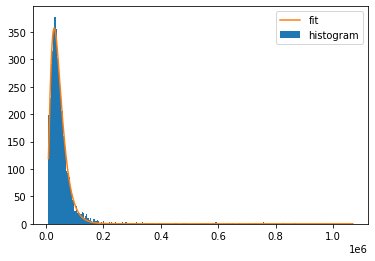

In [33]:
bin_heights, bin_borders, _ = plt.hist(rad, bins='auto', label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
p0 = [1e-13,10**4.7,2.0,2.5]
p0 = [9.911022172267181e-14, 83541.30496934506, 1.4103507388295065, 7.591585606117424]
p0 = [1.1089668449508195e-13, 159040.35960792194, 1.245453537128037, 14.615831796434918]
p0 = [1.e-13, 159040., 2., 2.5] 


# lb = [0.,0.,0.,0.]  # lower bound
b=(0, np.Inf)
popt_hist, _ = curve_fit(f, bin_centers, bin_heights, p0=p0, bounds=b)
print(popt_hist)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, f(x_interval_for_fit, *popt_hist), label='fit')
plt.legend()
# plt.yscale("log")
# plt.xscale("log")
# popt_hist[3]/popt_hist[2]

In [34]:
xdata = np.linspace(np.min(rad),1e5,10**4)
ydata = kde(rad).evaluate(xdata)
# ydata = 
p0 = [1e-14,7.2e4,2.,2.5]
p0 = [1.1089668449508195e-13, 159040.35960792194, 1.245453537128037, 14.615831796434918]
p0 = [1.e-13, 159040., 2., 2.5] 

popt, _ = curve_fit(f, xdata, ydata, p0=p0, bounds=b)
print(popt)
popt[3]/popt[2]

[1.13501606e-13 3.44378215e+05 1.03480777e+00 2.50859542e+01]


24.242139270052064

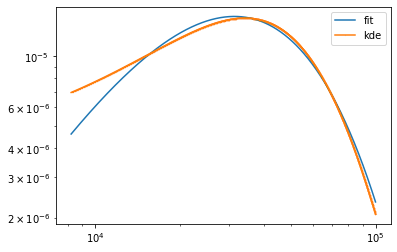

In [31]:
plt.plot(xdata, f(xdata, *popt), label='fit')
plt.plot(xdata,ydata,marker='o',markersize=0.1, label='kde')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.show()


In [ ]:
np.argmax(ydata)
xdata[916]
9.8/2.3